# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [8]:
movies_df = pd.read_csv('data/movies.csv')

print(movies_df.head())
print(movies_df.info()) 

                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [9]:
print(f"Dataset size: {movies_df.shape}")

missing_data = movies_df.isnull().sum()
print(missing_data)

Dataset size: (9999, 9)
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [12]:
movies_df = movies_df.copy()

movies_df['YEAR'] = movies_df['YEAR'].fillna('Unknown')

movies_df['GENRE'] = movies_df['GENRE'].fillna('Unknown')

movies_df['RATING'] = movies_df['RATING'].fillna(movies_df['RATING'].median())

movies_df['VOTES'] = movies_df['VOTES'].fillna('0')

In [13]:

print(movies_df.isnull().sum())


print(movies_df.head())

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64
                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 7.1   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what ma

**1.4 Drop the duplicated rows**

In [14]:
movies_df = movies_df.drop_duplicates()
print(movies_df.shape)

(9568, 9)


**1.5 Replace the columns names to make them all lowercase**

In [17]:
movies_df.columns = movies_df.columns.str.lower()
print(movies_df.columns)

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [18]:
movies_df['votes'] = movies_df['votes'].str.replace(',', '').astype(float)
print(movies_df['votes'].dtype)

float64


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [19]:
average_rating = movies_df['rating'].mean()
print(f"The average rating is: {average_rating}")

The average rating is: 6.94608068561873


**2.2 What is the maximum runtime?**

In [20]:
max_runtime = movies_df['runtime'].max()
print(f"The maximum runtime is: {max_runtime}")

The maximum runtime is: 853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [21]:
longest_runtime_movie = movies_df[movies_df['runtime'] == max_runtime]
print(longest_runtime_movie)

                        movies         year  \
1902  El tiempo entre costuras  (2013–2014)   

                                        genre  rating  \
1902  \nAdventure, Drama, History                 8.3   

                                               one-line  \
1902  \nSira Quiroga is a young Spanish dressmaker e...   

                                                  stars   votes  runtime gross  
1902  \n            \n    Stars:\nAdriana Ugarte, \n...  3876.0    853.0   NaN  


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

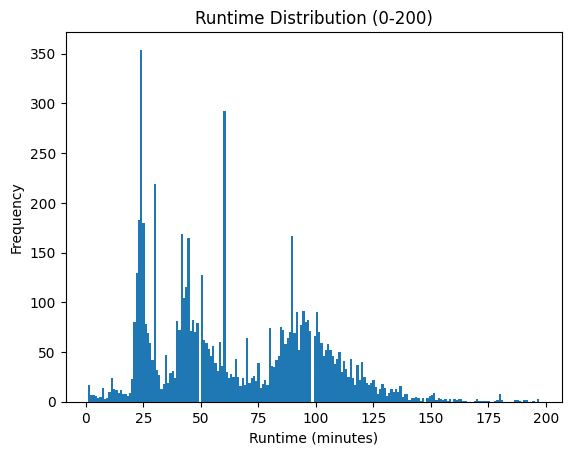

In [23]:
import matplotlib.pyplot as plt


filtered_runtimes = movies_df[movies_df['runtime'].between(0, 200)]


plt.hist(filtered_runtimes['runtime'], bins=200)
plt.title('Runtime Distribution (0-200)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [24]:
top_10_percent_votes = movies_df['votes'].quantile(0.90)
print(f"A movie needs at least {top_10_percent_votes} votes to be in the top 10% most voted films.")

A movie needs at least 16266.200000000015 votes to be in the top 10% most voted films.


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [25]:
df_meta = pd.read_csv('data/movies_metadata.csv')
print(df_meta.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

/var/folders/k1/kpcfrnw11qzgdpmzw0nlpfqm0000gn/T/ipykernel_70176/1599413901.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('data/movies_metadata.csv')


In [26]:
merge_df = pd.merge(movies_df, df_meta, left_on='movies', right_on='title', how='inner')

print(merge_df.head())

             movies         year                                  genre  \
0  The Walking Dead  (2010–2022)  \nDrama, Horror, Thriller               
1  The Walking Dead  (2010–2022)  \nDrama, Horror, Thriller               
2           Lucifer  (2016–2021)    \nCrime, Drama, Fantasy               
3   The Good Doctor     (2017– )                    \nDrama               
4      Supernatural  (2005–2020)   \nDrama, Fantasy, Horror               

   rating                                           one-line  \
0     8.2  \nSheriff Deputy Rick Grimes wakes up from a c...   
1     8.2  \nSheriff Deputy Rick Grimes wakes up from a c...   
2     8.1  \nLucifer Morningstar has decided he's had eno...   
3     8.1  \nShaun Murphy, a young surgeon with autism an...   
4     8.4  \nTwo brothers follow their father's footsteps...   

                                               stars     votes  runtime_x  \
0  \n            \n    Stars:\nAndrew Lincoln, \n...  885805.0       44.0   
1  \n     